# Analisis de violencia domestica en Colombia

### Librerias a usar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar datos

In [3]:
datos = pd.read_csv('./Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv', header=0)
datos.tail(10)

C:\Users\Dduqu\AppData\Local\Temp\ipykernel_1452\2104553032.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv('./Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv', header=0)


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
476960,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,27/03/2021,FEMENINO,ADULTOS,1
476961,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,15/04/2021,FEMENINO,ADULTOS,1
476962,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,44335,FEMENINO,ADULTOS,3
476963,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,44335,MASCULINO,ADULTOS,1
476964,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44199,FEMENINO,ADULTOS,1
476965,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44250,FEMENINO,MENORES,1
476966,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44262,FEMENINO,ADULTOS,1
476967,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44300,FEMENINO,ADULTOS,1
476968,CUNDINAMARCA,TAUSA,25793000,NaN,44294,FEMENINO,ADULTOS,1
476969,CUNDINAMARCA,ZIPAQUIRÁ,25899000,NaN,44245,FEMENINO,ADULTOS,1


In [4]:
datos.dtypes

DEPARTAMENTO    object
MUNICIPIO       object
CODIGO DANE     object
ARMAS MEDIOS    object
FECHA HECHO     object
GENERO          object
GRUPO ETARIO    object
CANTIDAD         int64
dtype: object

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476970 entries, 0 to 476969
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476970 non-null  object
 1   MUNICIPIO     476970 non-null  object
 2   CODIGO DANE   476970 non-null  object
 3   ARMAS MEDIOS  476968 non-null  object
 4   FECHA HECHO   476970 non-null  object
 5   GENERO        476967 non-null  object
 6   GRUPO ETARIO  475355 non-null  object
 7   CANTIDAD      476970 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 29.1+ MB


In [6]:
datos.isnull().sum()

DEPARTAMENTO       0
MUNICIPIO          0
CODIGO DANE        0
ARMAS MEDIOS       2
FECHA HECHO        0
GENERO             3
GRUPO ETARIO    1615
CANTIDAD           0
dtype: int64

In [7]:
data = datos.copy()
data['ARMAS MEDIOS'].fillna(data['ARMAS MEDIOS'].mode()[0], inplace = True)
data['GENERO'].fillna('NO REPORTA', inplace=True)
data['GENERO'].replace({'-':'NO REPORTA'}, inplace=True)
data['GRUPO ETARIO'].fillna(data['GRUPO ETARIO'].mode()[0], inplace = True)
data['CODIGO DANE'].fillna(data['CODIGO DANE'].mode()[0], inplace = True)
data['CANTIDAD'].fillna(data['CANTIDAD'].mode()[0], inplace=True)
data['FECHA HECHO'].fillna(data['FECHA HECHO'].mode()[0], inplace=True)
data['DEPARTAMENTO'].replace({'NO REPORTA':data['DEPARTAMENTO'].mode()[0]}, inplace=True)

In [8]:
data.isnull().sum()

DEPARTAMENTO    0
MUNICIPIO       0
CODIGO DANE     0
ARMAS MEDIOS    0
FECHA HECHO     0
GENERO          0
GRUPO ETARIO    0
CANTIDAD        0
dtype: int64

In [9]:
pd.unique(data['GENERO'])

array(['MASCULINO', 'FEMENINO', 'NO REPORTA'], dtype=object)

## Victimas por genero

In [10]:
victims = data['GENERO']
man = 0
woman = 0
no_report = 0
for victim in victims:
    if victim == 'MASCULINO':
        man += 1
    elif victim == 'FEMENINO':
        woman += 1
    else:
        no_report += 1
        
print(f'{woman} victims were WOMEN, {man} victims were MEN and {no_report} victims do not report their gender.')
rel_woman_man = round(woman/man, 1)
print(f'Furthermore, for each man victim, {rel_woman_man} women suffer domestic violence')

366907 victims were WOMEN, 109759 victims were MEN and 304 victims do not report their gender.
Furthermore, for each man victim, 3.3 women suffer domestic violence


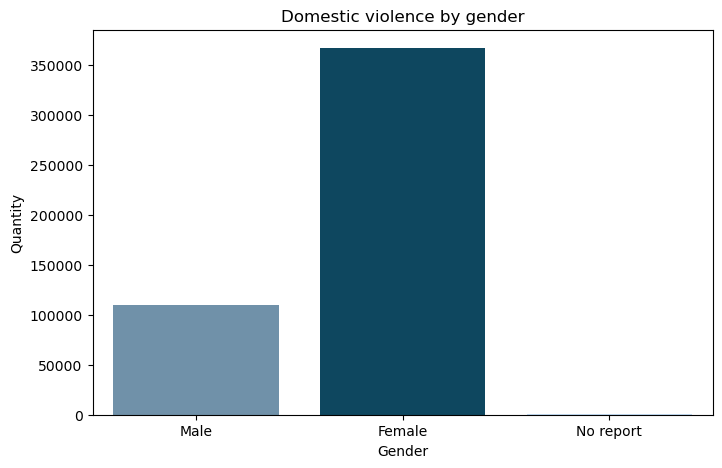

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='GENERO', palette=['#6792b2','#004c6d','#bbdefc'])
plt.xticks(np.arange(3),['Male','Female','No report'])
plt.xlabel('Gender')
plt.ylabel('Quantity')
plt.title('Domestic violence by gender')
plt.show()

## Victimas por departamento

In [15]:
cases = data.groupby('DEPARTAMENTO').count()
len(cases['MUNICIPIO'])

32

In [16]:
vict = data.groupby('DEPARTAMENTO').sum()

In [17]:
deptos = pd.unique(data['DEPARTAMENTO'])
deptos.sort()
population = [74541,6456207,262315,2461001,2097086,1276367,
              988003,477619,356438,1379070,1028880,500076,
              10558824,1709603,40203,957814,107934,1154804,
              1259667,961292,1744275,1355723,345204,565266,
              951945,76442,2061095,851526,1408274,4613377,42817,
              68575]
casos_1 = casos['MUNICIPIO']
#https://departamentosdecolombia.com/colombia/poblacion/

In [20]:
nuevos_datos = {
    'departamento': deptos,
    'casos' : casos_1,
    'victimas': vict['CANTIDAD'],
    'poblacion': population  
}

p_depto = pd.DataFrame(nuevos_datos)

In [22]:
p_depto['vict_x_diezmilhab'] = round((10000*p_depto['victimas'])/p_depto['poblacion'],0)
p_depto = p_depto.sort_values('vict_x_diezmilhab', ascending=False)
p_depto.head()

,departamento,casos,victimas,poblacion,vict_x_diezmilhab
DEPARTAMENTO,,,,,
SANTANDER,SANTANDER,38493,55561,2061095,270.0
BOYACÁ,BOYACÁ,26920,33794,1276367,265.0
META,META,16223,24045,961292,250.0
CUNDINAMARCA,CUNDINAMARCA,88106,255519,10558824,242.0
AMAZONAS,AMAZONAS,1408,1617,74541,217.0


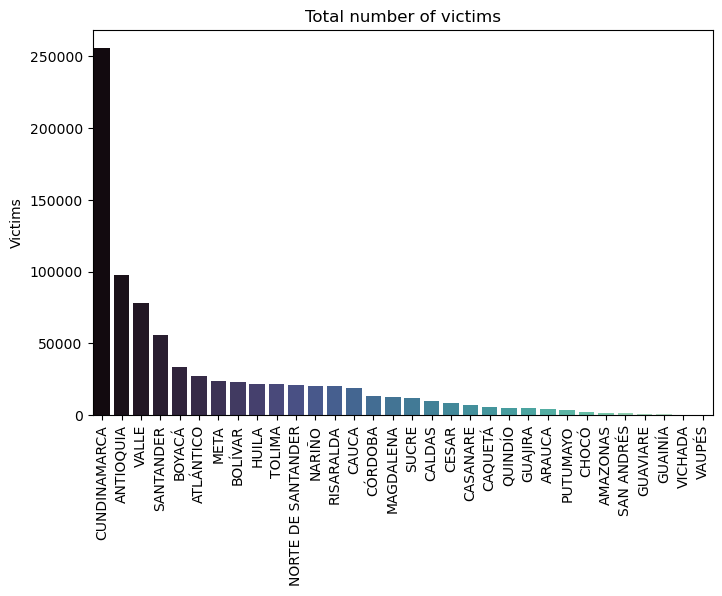

In [23]:
p_depto_1 = p_depto.sort_values('victimas', ascending=False)
fig = plt.figure(figsize=(8,5))
sns.barplot(data=p_depto_1, x='departamento', y='victimas', palette='mako')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Victims')
plt.title('Total number of victims')
plt.show()

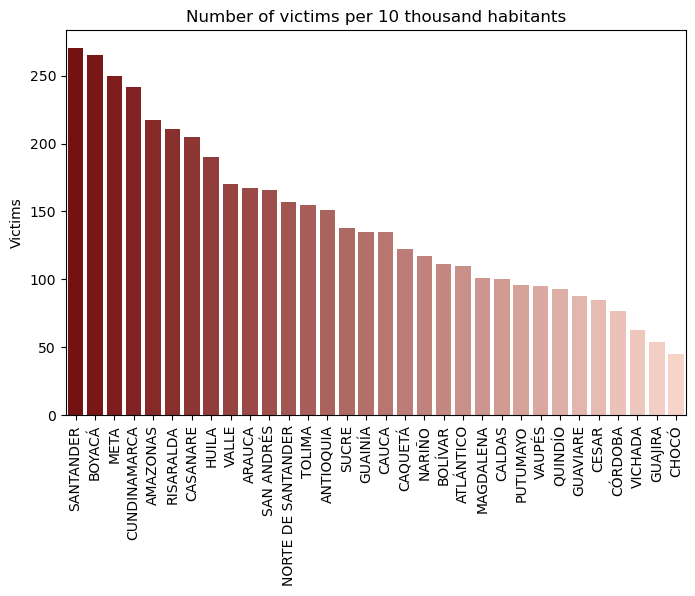

In [24]:
fig = plt.figure(figsize=(8,5))
sns.barplot(data=p_depto, x='departamento', y='vict_x_diezmilhab', palette=sns.blend_palette(['#850000','#fed0c3'],32))
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Victims')
plt.title('Number of victims per 10 thousand habitants')
plt.show()

### Armas empleadas

In [25]:
pd.unique(data['ARMAS MEDIOS'])

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'CORTANTES', 'CORTOPUNZANTES', 'NO REPORTADO', 'PUNZANTES',
       'SIN EMPLEO DE ARMAS', 'NO REPORTA', 'ESCOPOLAMINA', '-'],
      dtype=object)

In [26]:
data['ARMAS MEDIOS'].replace({'-':'NO REPORTA'}, inplace=True)
data['ARMAS MEDIOS'].replace({'NO REPORTADO':'NO REPORTA'}, inplace=True)
data['ARMAS MEDIOS'].replace({'CORTOPUNZANTES':'ARMA BLANCA / CORTOPUNZANTE'}, inplace=True)
data['ARMAS MEDIOS'].replace({'CORTANTES':'ARMA BLANCA / CORTOPUNZANTE'}, inplace=True)
data['ARMAS MEDIOS'].replace({'PUNZANTES':'ARMA BLANCA / CORTOPUNZANTE'}, inplace=True)

In [27]:
armas = data.groupby('ARMAS MEDIOS').count()
armas = armas.sort_values('CANTIDAD', ascending=False)
armas

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
ARMAS MEDIOS,,,,,,,
CONTUNDENTES,244947,244947,244947,244947,244947,244947,244947
SIN EMPLEO DE ARMAS,108785,108785,108785,108785,108785,108785,108785
NO REPORTA,76343,76343,76343,76343,76343,76343,76343
ARMA BLANCA / CORTOPUNZANTE,40709,40709,40709,40709,40709,40709,40709
ESCOPOLAMINA,3863,3863,3863,3863,3863,3863,3863
ARMA DE FUEGO,2323,2323,2323,2323,2323,2323,2323


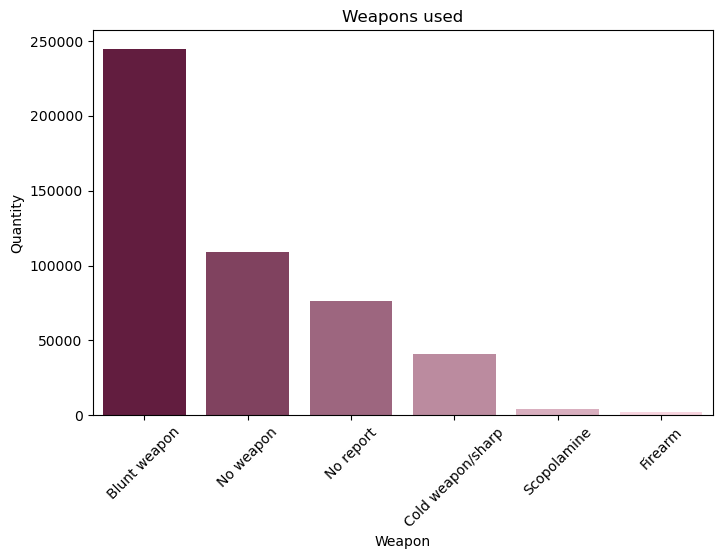

In [28]:
medios = ['Blunt weapon','No weapon','No report','Cold weapon/sharp','Scopolamine','Firearm']
plt.figure(figsize=(8,5))
sns.barplot(data=armas, x=medios, y='CANTIDAD', palette=sns.blend_palette(['#6d123f','#fdcedd']))
plt.xticks(rotation=45)
plt.xlabel('Weapon')
plt.ylabel('Quantity')
plt.title('Weapons used')
plt.show()